In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as stats



In [2]:
world_data_df = pd.read_csv("data_file/World_2005-2021.csv")

world_data_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [3]:
world_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   Year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [8]:
filtered_df=world_data_df[["Social support","Generosity","Freedom to make life choices"]]
filtered_df

,Social support,Generosity,Freedom to make life choices
0,0.450662,0.173169,0.718114
1,0.552308,0.195469,0.678896
2,0.539075,0.125859,0.600127
3,0.521104,0.167723,0.495901
4,0.520637,0.241247,0.530935
...,...,...,...
2084,0.754147,-0.113937,0.752826
2085,0.775388,-0.084747,0.762675
2086,0.759162,-0.081540,0.631908
2087,0.717243,-0.029376,0.643303


In [9]:
cleaned_df=filtered_df.dropna()
cleaned_df

,Social support,Generosity,Freedom to make life choices
0,0.450662,0.173169,0.718114
1,0.552308,0.195469,0.678896
2,0.539075,0.125859,0.600127
3,0.521104,0.167723,0.495901
4,0.520637,0.241247,0.530935
...,...,...,...
2084,0.754147,-0.113937,0.752826
2085,0.775388,-0.084747,0.762675
2086,0.759162,-0.081540,0.631908
2087,0.717243,-0.029376,0.643303


The correlation between generosity and social support is: 0.06975855354377598


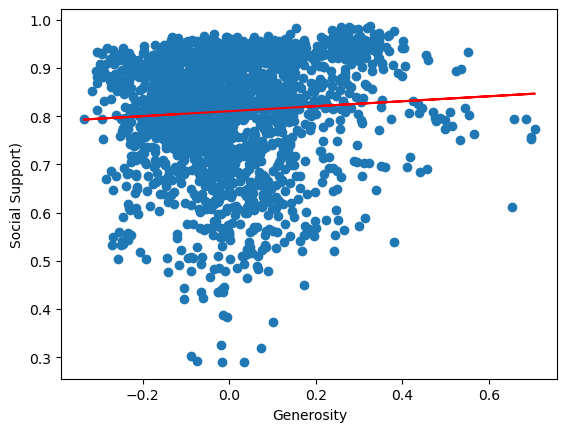

In [7]:
x_values = cleaned_df["Generosity"]
y_values = cleaned_df["Social support"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Generosity")
plt.ylabel("Social Support)")
print(f"The correlation between generosity and social support is: {rvalue}")
plt.show()


The correlation between Generosity and Freedom to Make Life Choices is: 0.40222539459942636


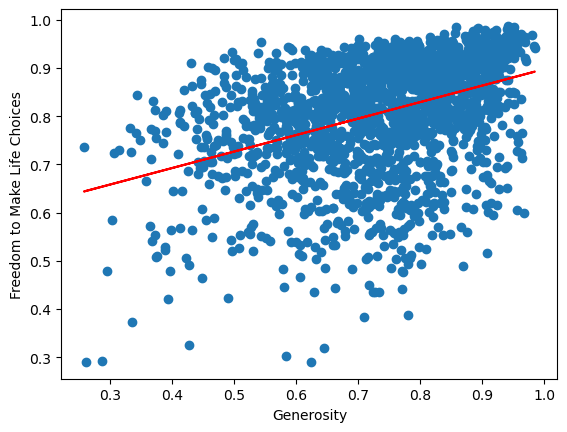

In [11]:
x_values = cleaned_df["Freedom to make life choices"]
y_values = cleaned_df["Social support"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Generosity")
plt.ylabel("Freedom to Make Life Choices")
print(f"The correlation between Generosity and Freedom to Make Life Choices is: {rvalue}")
plt.show()